(0.25, 1.75)

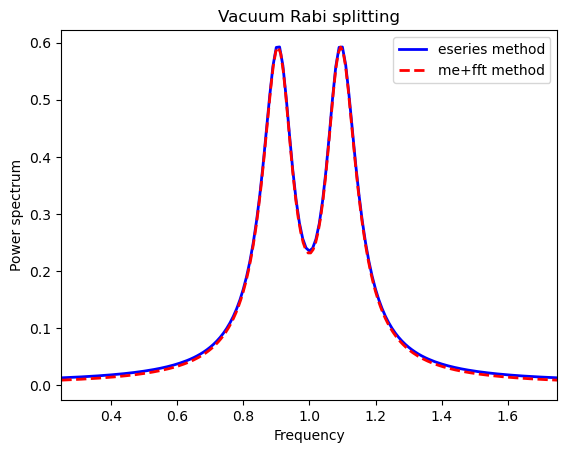

In [2]:
import numpy as np
from matplotlib import pyplot
import qutip
N = 4 # number of cavity fock states
wc = wa = 1.0 * 2 * np.pi # cavity and atom frequency
g = 0.1 * 2 * np.pi # coupling strength
kappa = 0.75 # cavity dissipation rate
gamma = 0.25 # atom dissipation rate
# Jaynes-Cummings Hamiltonian
a = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
sm = qutip.tensor(qutip.qeye(N), qutip.destroy(2))
H = wc*a.dag()*a + wa*sm.dag()*sm + g*(a.dag()*sm + a*sm.dag())
# collapse operators
n_th = 0.25
c_ops = [
np.sqrt(kappa * (1 + n_th)) * a,
np.sqrt(kappa * n_th) * a.dag(),
np.sqrt(gamma) * sm,
]
# calculate the correlation function using the mesolve solver, and then fft to
# obtain the spectrum. Here we need to make sure to evaluate the correlation
# function for a sufficient long time and sufficiently high sampling rate so
# that the discrete Fourier transform (FFT) captures all the features in the
# resulting spectrum.
tlist = np.linspace(0, 100, 5000)
corr = qutip.correlation_2op_1t(H, None, tlist, c_ops, a.dag(), a)
wlist1, spec1 = qutip.spectrum_correlation_fft(tlist, corr)
# calculate the power spectrum using spectrum, which internally uses essolve
# to solve for the dynamics (by default)
wlist2 = np.linspace(0.25, 1.75, 200) * 2 * np.pi
spec2 = qutip.spectrum(H, wlist2, c_ops, a.dag(), a)
# plot the spectra
fig, ax = pyplot.subplots(1, 1)
ax.plot(wlist1 / (2 * np.pi), spec1, 'b', lw=2, label='eseries method')
ax.plot(wlist2 / (2 * np.pi), spec2, 'r--', lw=2, label='me+fft method')
ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Rabi splitting')
ax.set_xlim(wlist2[0]/(2*np.pi), wlist2[-1]/(2*np.pi))

# 1 cavity + qubit

(0.25, 1.75)

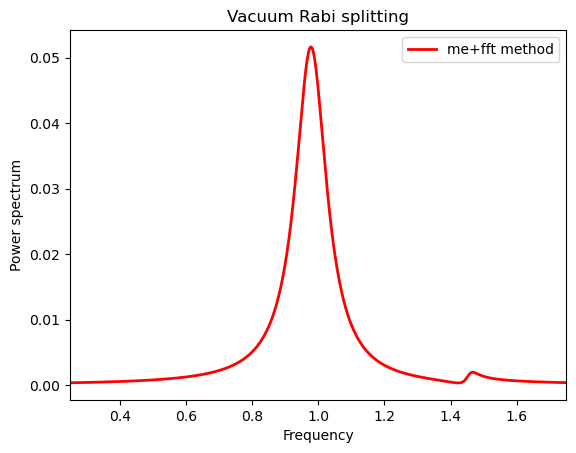

In [7]:
import numpy as np
from matplotlib import pyplot
import qutip
Na = 2
Nc = 4 # number of cavity fock states
wc =  1.0 * 2 * np.pi # cavity and atom frequency
wa = 9
g = 0.1 * 2 * np.pi # coupling strength
kappa = 0.75 # cavity dissipation rate
gamma = 0.25 # atom dissipation rate
# Jaynes-Cummings Hamiltonian
a = qutip.tensor(qutip.destroy(Nc), qutip.qeye(Na))
sm = qutip.tensor(qutip.qeye(Nc), qutip.destroy(Na))
H = wc*a.dag()*a + wa*sm.dag()*sm + g*(a.dag()*sm + a*sm.dag())
# collapse operators
n_th = 0.01
c_ops = [
np.sqrt(kappa * (1 + n_th)) * a,
np.sqrt(kappa * n_th) * a.dag(),
np.sqrt(gamma) * sm,
]
wlist2 = np.linspace(0.25, 1.75, 2000) * 2 * np.pi
spec2 = qutip.spectrum(H, wlist2, c_ops, a.dag(), a)
# plot the spectra
fig, ax = pyplot.subplots(1, 1)
ax.plot(wlist2 / (2 * np.pi), spec2, 'r-', lw=2, label='me+fft method')
ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Rabi splitting')
ax.set_xlim(wlist2[0]/(2*np.pi), wlist2[-1]/(2*np.pi))

# 2 bloch-redfield no cavity

In [54]:
# fitting parameters ae/ah
ah = 1.9e-9  # m
ae = 3.5e-9  # m
# GaAs material parameters
De = 7
Dh = -3.5
v = 5110  # m/s
rho_m = 5370  # kg/m^3
# Other Constants
hbar = 1.05457173e-34  # Js
T = 4.2  # Kelvin, temperature

# constants for temperature dependence
t1 = 0.6582119
t2 = 0.086173

# General J factor
J = (
    "(1.6 * 1e-13 * w**3) / (4 * pi**2 * rho_m * hbar * v**5) * "
    + "(De * exp(-(w * 1e12 * ae * 0.5 / v)**2) - "
    + "Dh * exp(-(w * 1e12 * ah * 0.5 / v)**2))**2"
)

# Term for positive frequencies
JT_p = (
    J
    + "* (1 + exp(-w*t1/(T*t2)) / \
          (1-exp(-w*t1/(T*t2))))"
)

# Term for negative frequencies
JT_m = (
    "-1.0* "
    + J
    + "* exp(w*t1/(T*t2)) / \
            (1-exp(w*t1/(T*t2)))"
)


# define spectra with variable names
spectra_cb = "(w > 0) * " + JT_p + "+ (w < 0) * " + JT_m

# add a check for min size of w to avoid numerical problems
spectra_cb = "0 if (w > -1e-4 and w < 1e-4) else " + spectra_cb

# define string with numerical values expect for w
constants = ["ah", "ae", "De", "Dh", "v", "rho_m", "hbar", "T", "t1", "t2"]
spectra_cb_numerical = spectra_cb
for c in constants:
    # replace constants with numerical value
    spectra_cb_numerical = spectra_cb_numerical.replace(c, str(eval(c)))

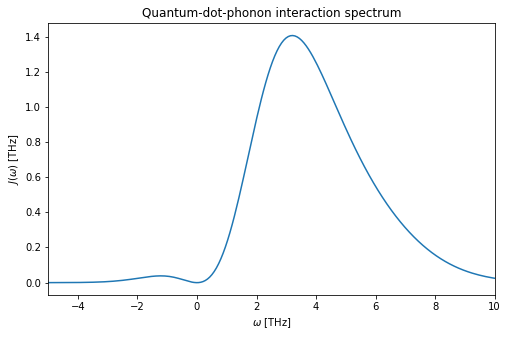

In [56]:
import matplotlib.pyplot as plt
# frequency list
spec_list = np.linspace(-5, 10, 200)

# define shortcuts to evaluate string
pi = np.pi
exp = np.exp

# plot the spectrum J(w)
plt.figure(figsize=(8, 5))
plt.plot(spec_list, [eval(spectra_cb.replace("w", str(_))) for _ in spec_list])
plt.xlim(-5, 10)
plt.xlabel("$\\omega$ [THz]")
plt.ylabel("$J(\\omega)$ [THz]")
plt.title("Quantum-dot-phonon interaction spectrum");

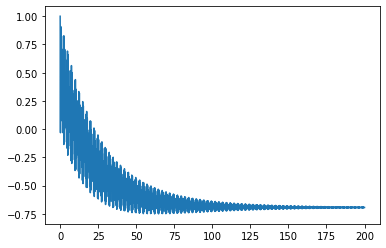

In [53]:
import numpy as np
from matplotlib import pyplot
from qutip import *
Na = 2
wa = 5
delta = 5.2
H0 = wa*sigmaz()+delta*sigmax()
H1 = [sigmax(),"A*cos(w*t)"]
H = [H0,H1]
psi0 = (fock(2,0)+0*fock(2,1)).unit()
tlist = np.linspace(0,200,1000)
args = {'w':3.4,"A":0}
kappa = 0.1
a_ops = [[sigmax(), spectra_cb_numerical]]

res = brmesolve(H0,psi0,tlist,a_ops,[sigmaz()],[],args)
pyplot.plot(tlist,res.expect[0])

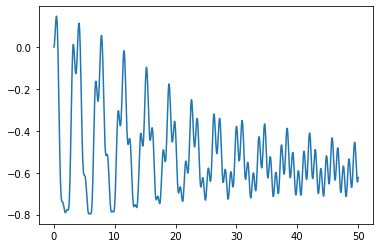

In [39]:
import numpy as np
from matplotlib import pyplot
from qutip import *
Na = 2
wa = 1
delta = 0
H0 = wa*sigmaz()+delta*sigmax()
H1 = [sigmax(),"cos(w*t)"]
H = [H0,H1]
psi0 = (fock(2,0)+fock(2,1)).unit()
tlist = np.linspace(0,50,1000)
args = {'w':3.4}
kappa = 0.1
a_ops = [[sigmax(), "{kappa}*(w>0)".format(kappa=kappa)]]

res = brmesolve(H,psi0,tlist,a_ops,[sigmaz()],[],args)
pyplot.plot(tlist,res.expect[0])

# 3 third part 驱动比特加腔

In [5]:
import numpy as np
from matplotlib import pyplot
from qutip import *
Na = 2
Nc = 4 # number of cavity fock states
wc =  1.0 * 2 * np.pi # cavity and atom frequency
wa = 9
g = 0.1 * 2 * np.pi # coupling strength
kappa = 0.75 # cavity dissipation rate
gamma = 0.25 # atom dissipation rate
# Jaynes-Cummings Hamiltonian
a = qutip.tensor(qutip.destroy(Nc), qutip.qeye(Na))
sm = qutip.tensor(qutip.qeye(Nc), qutip.destroy(Na))
H0 = wc*a.dag()*a + wa*sm.dag()*sm + g*(a.dag()*sm + a*sm.dag())
H1 = [sigmax(),'cos(w*t)']
H = [H0,H1]
# collapse operators
n_th = 0.01
c_ops = [
np.sqrt(kappa * (1 + n_th)) * a,
np.sqrt(kappa * n_th) * a.dag(),
np.sqrt(gamma) * sm,
]
psi0 = tensor(fock(Nc,0),fock(Na,0))
tlist = np.linspace(0,100,1000)
corr = qutip.correlation_2op_1t(H, psi0, tlist, c_ops, a.dag(), a)
wlist1, spec1 = qutip.spectrum_correlation_fft(tlist, corr)
# plot the spectra
fig, ax = pyplot.subplots(1, 1)
ax.plot(spec1, 'r-', lw=2, label='me+fft method')
ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Rabi splitting')
ax.set_xlim(wlist2[0]/(2*np.pi), wlist2[-1]/(2*np.pi))

TypeError: Qobj not compatible.